## E-commerce Customer Segmentation

**Abstract:**<br>
A key challenge for e-commerce businesses is to analyze the trend in the market to increase their sales. The trend can be easily observed if the companies can group the customers; based on their activity on the ecommerce site. This grouping can be done by applying different criteria like previous orders, mostly searched brands and so on.

**Problem Statement:**<br>
Given the e-commerce data, use k-means clustering algorithm to cluster customers with similar interest.

**Dataset Information:**<br>
The data was collected from a well known e-commerce website over a period of time based on the customer’s search profile.


In [1]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data 

In [2]:
df = pd.read_excel("cust_data.xlsx")

df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [3]:
# checking shape of our data 
df.shape

(30000, 38)

### Data Cleaning 

In [4]:
# Checking null values 
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [5]:
# Gender have null values. So for now will replace it with none
df['Gender'].fillna('None', inplace=True)

In [6]:
df.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

### Encoding Categorical Column

In [7]:
# Let's check the data type of our columns
df.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

In [8]:
# Gender is object columns. So let's check the value counts in it.
df['Gender'].value_counts()

F       22054
M        5222
None     2724
Name: Gender, dtype: int64

In [9]:
# As we have 3 options, we will replace those with 1, 2 & 3 to make it integer column
df['Gender'] = df['Gender'].replace({'F':1, 'M':2, 'None':3})

In [10]:
df['Gender'].value_counts()

1    22054
2     5222
3     2724
Name: Gender, dtype: int64

In [11]:
df.dtypes

Cust_ID                   int64
Gender                    int64
Orders                    int64
Jordan                    int64
Gatorade                  int64
Samsung                   int64
Asus                      int64
Udis                      int64
Mondelez International    int64
Wrangler                  int64
Vans                      int64
Fila                      int64
Brooks                    int64
H&M                       int64
Dairy Queen               int64
Fendi                     int64
Hewlett Packard           int64
Pladis                    int64
Asics                     int64
Siemens                   int64
J.M. Smucker              int64
Pop Chips                 int64
Juniper                   int64
Huawei                    int64
Compaq                    int64
IBM                       int64
Burberry                  int64
Mi                        int64
LG                        int64
Dior                      int64
Scabal                    int64
Tommy Hi

Now all our columns have int data type

In [12]:
# Will not consider the Cust_ID column
data = df.iloc[:, 1:]

print(data.columns)

Index(['Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')


### Outlier's treatment 

In [13]:
# checking at lower end
data.describe(percentiles= (0.01, 0.02, 0.03, 0.05)).T

,count,mean,std,min,1%,2%,3%,5%,50%,max
Gender,30000.0,1.355667,0.640922,1.0,1.0,1.0,1.0,1.0,1.0,3.0
Orders,30000.0,4.169800,3.590311,0.0,0.0,0.0,0.0,0.0,4.0,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.0,0.0,0.0,0.0,0.0,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.0,0.0,0.0,0.0,0.0,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.0,0.0,0.0,0.0,0.0,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.0,0.0,0.0,0.0,0.0,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.0,0.0,0.0,0.0,0.0,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.0,0.0,0.0,0.0,0.0,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.0,0.0,0.0,0.0,0.0,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.0,0.0,0.0,0.0,0.0,16.0


In [14]:
# checking at upper end 
data.describe(percentiles= (0.96, 0.97, 0.98, 0.99)).T

,count,mean,std,min,50%,96%,97%,98%,99%,max
Gender,30000.0,1.355667,0.640922,1.0,1.0,3.0,3.0,3.00,3.0,3.0
Orders,30000.0,4.169800,3.590311,0.0,4.0,10.0,11.0,11.00,12.0,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.0,2.0,2.0,3.00,4.0,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.0,2.0,2.0,2.00,3.0,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.0,2.0,2.0,3.00,5.0,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.0,1.0,2.0,2.00,4.0,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.0,1.0,1.0,2.00,3.0,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.0,1.0,1.0,2.00,2.0,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.0,1.0,1.0,2.00,3.0,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.0,1.0,1.0,2.00,2.0,16.0


Except Gender and Orders columns, all other columns have outliers. So will clip the outliers with 99%

In [15]:
# Creating udf for outlier treatment 
def out_treat(x):
    x = x.clip(upper = x.quantile(0.99))
    return x

In [16]:
# Separating outliers column
out_cols = data.columns[2:]

In [17]:
# Clipping the outliers 
data[out_cols] = data[out_cols].apply(out_treat)

In [18]:
data.describe(percentiles= (0.96, 0.97, 0.98, 0.99)).T

,count,mean,std,min,50%,96%,97%,98%,99%,max
Gender,30000.0,1.355667,0.640922,1.0,1.0,3.0,3.0,3.00,3.0,3.0
Orders,30000.0,4.169800,3.590311,0.0,4.0,10.0,11.0,11.00,12.0,12.0
Jordan,30000.0,0.252933,0.684086,0.0,0.0,2.0,2.0,3.00,4.0,4.0
Gatorade,30000.0,0.236633,0.602647,0.0,0.0,2.0,2.0,2.00,3.0,3.0
Samsung,30000.0,0.203533,0.737106,0.0,0.0,2.0,2.0,3.00,5.0,5.0
Asus,30000.0,0.143133,0.573693,0.0,0.0,1.0,2.0,2.00,4.0,4.0
Udis,30000.0,0.123667,0.471643,0.0,0.0,1.0,1.0,2.00,3.0,3.0
Mondelez International,30000.0,0.125333,0.393400,0.0,0.0,1.0,1.0,2.00,2.0,2.0
Wrangler,30000.0,0.096733,0.424714,0.0,0.0,1.0,1.0,2.00,3.0,3.0
Vans,30000.0,0.088000,0.349180,0.0,0.0,1.0,1.0,2.00,2.0,2.0


### Standardize the data 

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

data_sc = sc.fit_transform(data)

print(type(data_sc))
print(data_sc.shape)

<class 'numpy.ndarray'>
(30000, 37)


## KMeans Clustering 

### Elbow Method

In [21]:
import warnings

warnings.filterwarnings('ignore')

In [22]:
from sklearn.cluster import KMeans

WCSS
 [1110000.0000000014, 1049873.4907590062, 1017670.6407205701, 986935.4966222448, 963631.9253199657, 931406.9281191701, 909972.6347154117, 894274.0765664947, 876494.1695117725]


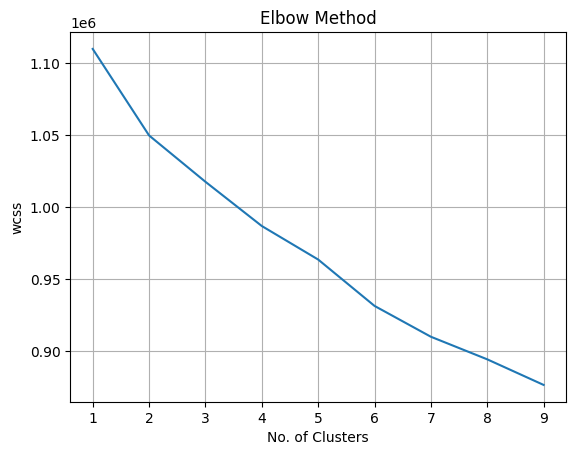

In [23]:
wcss = []

for i in range(1,10):
    m = KMeans(n_clusters= i)
    m.fit(data_sc)
    wcss.append(m.inertia_)
    
print('WCSS\n', wcss)
plt.plot(list(range(1,10)), wcss)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.grid()
plt.show()

### Silhoutte Score Method

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
sscore = []
for i in range(2,10):
    m = KMeans(n_clusters= i)
    m.fit(data_sc)
    sscore.append(silhouette_score(data_sc, m.labels_))


In [26]:
sil_score = pd.DataFrame({'No. of Clusters': list(range(2,10)), 'Sil_Score': sscore})
sil_score

,No. of Clusters,Sil_Score
0,2,0.331080
1,3,0.196918
2,4,0.195881
3,5,0.148647
4,6,0.161033
5,7,0.125137
6,8,0.141140
7,9,0.117457


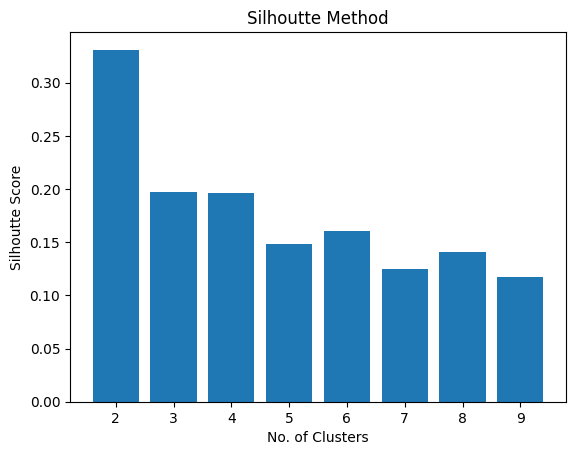

In [27]:
plt.bar(sil_score['No. of Clusters'], sil_score['Sil_Score'])
plt.xlabel('No. of Clusters')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Method')
plt.show()

#### From both Methods, we can see that optimal number of clusters are 2, 3 or 4 

### Creating Data Frame of standardize data 

In [28]:
data_sc = pd.DataFrame(data_sc, columns= data.columns)

data_sc.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1.005339,0.788301,-0.369745,-0.392663,-0.276129,-0.249499,-0.262208,-0.318596,-0.227765,5.475776,...,-0.246854,-0.413938,-0.499215,-0.342535,-0.229317,-0.217325,-0.348476,-0.297541,-0.246301,-0.208302
1,-0.554939,-1.161423,-0.369745,1.266711,-0.276129,-0.249499,-0.262208,-0.318596,-0.227765,-0.252023,...,-0.246854,1.201535,-0.499215,-0.342535,-0.229317,-0.217325,-0.348476,-0.297541,-0.246301,-0.208302
2,1.005339,0.788301,-0.369745,1.266711,-0.276129,-0.249499,-0.262208,-0.318596,-0.227765,-0.252023,...,-0.246854,-0.413938,-0.499215,-0.342535,-0.229317,-0.217325,-0.348476,2.494526,-0.246301,-0.208302
3,-0.554939,-1.161423,-0.369745,-0.392663,-0.276129,-0.249499,-0.262208,-0.318596,-0.227765,-0.252023,...,-0.246854,-0.413938,-0.499215,-0.342535,-0.229317,-0.217325,-0.348476,-0.297541,-0.246301,-0.208302
4,2.565616,1.623898,-0.369745,-0.392663,-0.276129,-0.249499,-0.262208,-0.318596,-0.227765,-0.252023,...,-0.246854,-0.413938,2.226504,-0.342535,-0.229317,-0.217325,-0.348476,-0.297541,2.838885,3.195319


### Model Building 

#### KMeans at K=2

In [29]:
# Creating copy of orignal data 
data1 = data.copy()

In [30]:
model = KMeans(n_clusters=2, random_state= 0)
model.fit(data_sc)

ypred = model.predict(data_sc)
cent = model.cluster_centers_

In [31]:
data1['Clusters'] = ypred

In [32]:
data1.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Clusters
0,2,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0


In [33]:
# Let's find the mean of each column. Will exclude the clusters column here

r1 = data1.iloc[:,:-1].mean().reset_index().set_index('index').T
r1.index = ['Mean']

r1

index,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Mean,1.355667,4.1698,0.252933,0.236633,0.203533,0.143133,0.123667,0.125333,0.096733,0.088,...,0.087533,0.256233,0.3663,0.144533,0.069133,0.0451,0.179767,0.106567,0.079833,0.0612


In [34]:
# Finding the mean of all columns for each clusters
r2 = data1.groupby('Clusters').mean()
r2

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Clusters,,,,,,,,,,,,,,,,,,,,,
0,1.190909,4.487390,0.574194,0.535777,0.403226,0.283284,0.246921,0.265982,0.252493,0.223754,...,0.355132,0.693548,0.799413,0.586804,0.273314,0.181525,0.550733,0.291202,0.345455,0.334897
1,1.376796,4.129071,0.211734,0.198270,0.177924,0.125160,0.107860,0.107296,0.076758,0.070590,...,0.053215,0.200150,0.310756,0.087815,0.042948,0.027604,0.132193,0.082888,0.045769,0.026100


In [35]:
# Will concate both the results for comparision 

res_clus = pd.concat([r1,r2])

res_clus.T

,Mean,0,1
Gender,1.355667,1.190909,1.376796
Orders,4.169800,4.487390,4.129071
Jordan,0.252933,0.574194,0.211734
Gatorade,0.236633,0.535777,0.198270
Samsung,0.203533,0.403226,0.177924
Asus,0.143133,0.283284,0.125160
Udis,0.123667,0.246921,0.107860
Mondelez International,0.125333,0.265982,0.107296
Wrangler,0.096733,0.252493,0.076758
Vans,0.088000,0.223754,0.070590


### UDF for getting results 

In [36]:
# Defining the function to get results
def kmean_result(k, data_sc, data):
    m = KMeans(n_clusters= k, random_state= 0)
    m.fit(data_sc)
    ypred = m.predict(data_sc)
    data['Clusters'] = ypred
    
    r1 = data.iloc[:,:-1].mean().reset_index().set_index('index').T
    r1.index = ['Mean']
    r2 = data.groupby('Clusters').mean()
    res_clst = pd.concat([r1,r2])
    return res_clst.T

### KMean at K=3

In [37]:
data2 = data.copy()

In [38]:
kmean_result(3, data_sc, data2)

,Mean,0,1,2
Gender,1.355667,1.217993,1.174680,1.424019
Orders,4.169800,4.148789,4.592745,4.033078
Jordan,0.252933,0.578547,0.559175,0.131057
Gatorade,0.236633,0.537716,0.478947,0.137282
Samsung,0.203533,0.382699,0.385491,0.132079
Asus,0.143133,0.248443,0.383499,0.057561
Udis,0.123667,0.188235,0.334566,0.050453
Mondelez International,0.125333,0.238062,0.259744,0.073868
Wrangler,0.096733,0.230450,0.228165,0.044832
Vans,0.088000,0.267820,0.167568,0.049942


In [39]:
data2.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Clusters
0,2,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
1,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,3,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0


### KMean at K=4

In [40]:
data3 = data.copy()

In [41]:
kmean_result(4, data_sc, data3)

,Mean,0,1,2,3
Gender,1.355667,1.224418,1.379496,1.171254,1.420907
Orders,4.169800,4.120677,4.419964,4.579664,4.031771
Jordan,0.252933,0.589273,0.154676,0.577370,0.134012
Gatorade,0.236633,0.534227,0.236511,0.480122,0.140414
Samsung,0.203533,0.383910,0.128597,0.395260,0.135397
Asus,0.143133,0.247001,0.127698,0.389908,0.059816
Udis,0.123667,0.189838,0.063849,0.351223,0.051264
Mondelez International,0.125333,0.239238,0.119604,0.263456,0.074769
Wrangler,0.096733,0.230769,0.049460,0.240061,0.045387
Vans,0.088000,0.273112,0.054856,0.170031,0.051598


In [42]:
data3.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Clusters
0,2,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,3
1,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,2,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,3,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0


### Vizualizing the clusters 

#### For Vizualization, we will have to get 2 Principal Components which can explain maximum variance of our data 

### PCA

In [43]:
from sklearn.decomposition import PCA

In [44]:
# Applying PCA
pca = PCA(n_components=2)  # Keeping no. of components = 2
pca_data = pca.fit_transform(data_sc)

pca_data

array([[-1.17859047, -0.33362101],
       [ 3.03495454,  0.43876001],
       [-0.68432994,  1.25006524],
       ...,
       [-1.32048793, -0.19258822],
       [-1.54141961,  0.54471144],
       [-0.71645625, -0.45582449]])

In [45]:
# Creating data frame with 2 Principal Components 
pca_df = pd.DataFrame(pca_data, columns= ['PC1', 'PC2'])

pca_df

,PC1,PC2
0,-1.178590,-0.333621
1,3.034955,0.438760
2,-0.684330,1.250065
3,-1.134764,0.193050
4,3.904696,3.340612
...,...,...
29995,-1.483526,0.135509
29996,-1.642786,0.114586
29997,-1.320488,-0.192588
29998,-1.541420,0.544711


### Vizualize at k=1

In [46]:
# Creating new data frame with Principal Components and clusters  
pca_df1 = pd.concat([pca_df, data1['Clusters']], axis=1) 

pca_df1

,PC1,PC2,Clusters
0,-1.178590,-0.333621,1
1,3.034955,0.438760,0
2,-0.684330,1.250065,1
3,-1.134764,0.193050,1
4,3.904696,3.340612,0
...,...,...,...
29995,-1.483526,0.135509,1
29996,-1.642786,0.114586,1
29997,-1.320488,-0.192588,1
29998,-1.541420,0.544711,1


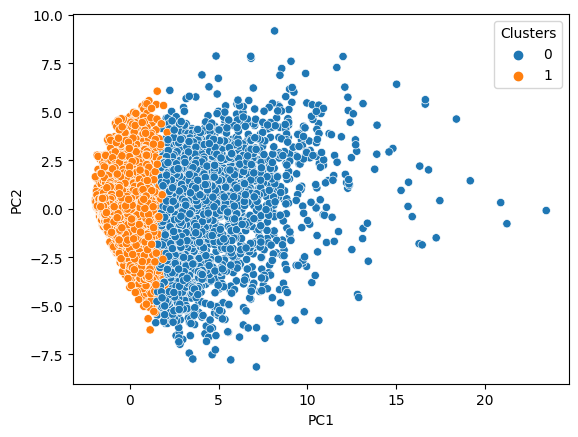

In [47]:
# Plotting our clusters 
sns.scatterplot(data= pca_df1, x='PC1', y='PC2', hue= pca_df1.columns[2])
plt.show()

### Plot at k=2

In [51]:
# Creating UDF to plot clusters 
def plot_clust(pca_df, data):
    pca_dfnew = pd.concat([pca_df, data.iloc[:,-1]], axis=1) 
    
    sns.scatterplot(data= pca_dfnew, x='PC1', y='PC2', hue= pca_dfnew.columns[2], palette="deep")
    plt.show()

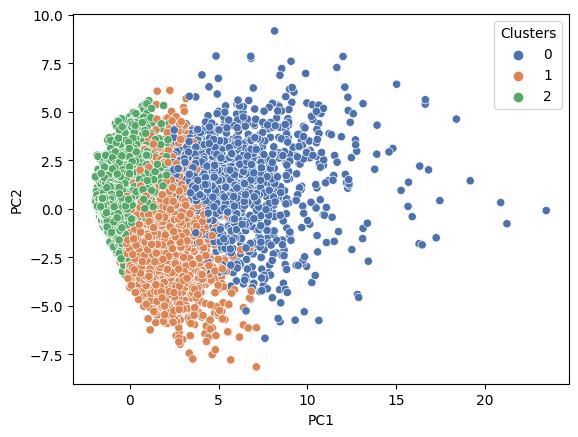

In [52]:
plot_clust(pca_df, data2)

### Plot at k=4

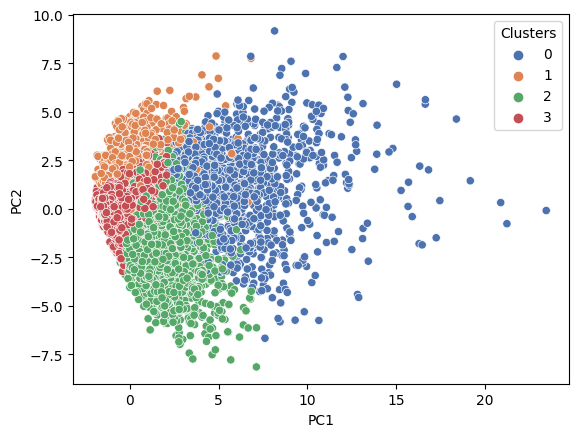

In [53]:
plot_clust(pca_df, data3)